Labour situation in Finland

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
%matplotlib inline
!pip install geopandas
import geopandas as gpd

<ipython-input-1-68d90c6ac383>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
name=['Timestamp','Sex', 'Age_group', 'Employed', 'Unemployed', 'Unemployment_rate',
     'Employment_rate']
employment= pd.read_csv('Employment in Finland.csv', sep=';', skiprows=3,header= None,
                        names= name)

employment['Timestamp']= employment.Timestamp.str.replace('M', '-')

employment

,Timestamp,Sex,Age_group,Employed,Unemployed,Unemployment_rate,Employment_rate
0,1989-01,Males,25 - 34,355,12,3.2,90.4
1,1989-01,Males,35 - 44,393,14,3.4,92.7
2,1989-01,Males,45 - 54,242,7,3.0,85.6
3,1989-01,Males,55 - 64,108,3,2.6,44.9
4,1989-01,Females,25 - 34,311,10,3.1,82.6
...,...,...,...,...,...,...,...
3067,2020-12,Males,55 - 64,241,23,8.6,67.1
3068,2020-12,Females,25 - 34,240,18,6.9,69.6
3069,2020-12,Females,35 - 44,282,18,6.1,81.4
3070,2020-12,Females,45 - 54,286,13,4.3,87.5


In [3]:
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          3072 non-null   object 
 1   Sex                3072 non-null   object 
 2   Age_group          3072 non-null   object 
 3   Employed           3072 non-null   int64  
 4   Unemployed         3072 non-null   object 
 5   Unemployment_rate  3072 non-null   object 
 6   Employment_rate    3072 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 168.1+ KB



Which AGe_group has the most data


In [4]:
# Because all of the information is object, I need to convert some of them to category type
employment['Unemployed']= pd.to_numeric(employment['Unemployed'], errors='coerce')
employment['Employment_rate']= pd.to_numeric(employment['Employment_rate'], errors='coerce')
employment['Unemployment_rate']=pd.to_numeric(employment['Unemployment_rate'], errors='coerce')
employment.head()

,Timestamp,Sex,Age_group,Employed,Unemployed,Unemployment_rate,Employment_rate
0,1989-01,Males,25 - 34,355,12.0,3.2,90.4
1,1989-01,Males,35 - 44,393,14.0,3.4,92.7
2,1989-01,Males,45 - 54,242,7.0,3.0,85.6
3,1989-01,Males,55 - 64,108,3.0,2.6,44.9
4,1989-01,Females,25 - 34,311,10.0,3.1,82.6


In [5]:
#Checking the dataset if having any missing value
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          3072 non-null   object 
 1   Sex                3072 non-null   object 
 2   Age_group          3072 non-null   object 
 3   Employed           3072 non-null   int64  
 4   Unemployed         3064 non-null   float64
 5   Unemployment_rate  3064 non-null   float64
 6   Employment_rate    3072 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 168.1+ KB


Which Age_group has the most umemployed and employed people:

In [82]:
Age_group= employment[['Employed', 'Unemployed']].groupby(employment['Age_group']).sum()
Age_group.Employed.sort_values(), Age_group.Unemployed.sort_values

(Age_group
 55 - 64    127854
 25 - 34    205260
 45 - 54    231910
 35 - 44    236967
 Name: Employed, dtype: int64,
 <bound method Series.sort_values of Age_group
 25 - 34    20174.0
 35 - 44    17645.0
 45 - 54    17112.0
 55 - 64    11387.0
 Name: Unemployed, dtype: float64>)

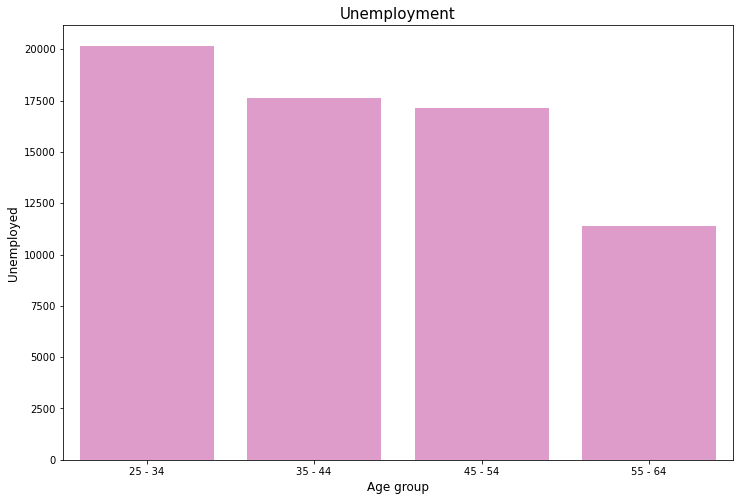

In [83]:
color=sns.color_palette()
unemployment_age= Age_group.Unemployed
plt.figure(figsize=(12,8))
sns.barplot(unemployment_age.index, unemployment_age.values, 
           alpha=0.8, color= color[6])
plt.ylabel('Unemployed', fontsize=12)
plt.xlabel('Age group', fontsize=12)
plt.title('Unemployment', fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

In [84]:
employment.head()

,Timestamp,Sex,Age_group,Employed,Unemployed,Unemployment_rate,Employment_rate
0,1989-01,Males,25 - 34,355,12.0,3.2,90.4
1,1989-01,Males,35 - 44,393,14.0,3.4,92.7
2,1989-01,Males,45 - 54,242,7.0,3.0,85.6
3,1989-01,Males,55 - 64,108,3.0,2.6,44.9
4,1989-01,Females,25 - 34,311,10.0,3.1,82.6


In [85]:
# Now I do similarly with periof of time for the unemploymment rate
#time_group= employment['Unemployment_rate'].groupby(employment['Timestamp']).mean().reset_index()
time_group=employment.groupby(['Timestamp'])['Unemployment_rate', 'Unemployed', 'Unemployment_rate', 'Employment_rate'
                                            ].aggregate('sum').reset_index()
#unemployment_timegroup= time_group.Unemployment_rate
#unemployment_timegroup.head()
time_group

<ipython-input-85-47c4d33575d8>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_group=employment.groupby(['Timestamp'])['Unemployment_rate', 'Unemployed', 'Unemployment_rate', 'Employment_rate'


,Timestamp,Unemployment_rate,Unemployed,Unemployment_rate,Employment_rate
0,1989-01,25.4,69.0,25.4,608.2
1,1989-02,23.1,58.0,23.1,605.1
2,1989-03,23.0,55.0,23.0,602.6
3,1989-04,19.7,51.0,19.7,613.7
4,1989-05,18.1,46.0,18.1,614.9
...,...,...,...,...,...
379,2020-08,54.6,160.0,54.6,630.1
380,2020-09,56.5,169.0,56.5,634.2
381,2020-10,51.9,154.0,51.9,637.4
382,2020-11,47.9,140.0,47.9,634.7


In [86]:
employment['Timestamp']=pd.to_datetime(employment['Timestamp'],
                                      format='%Y-%M')
employment['Year']=employment['Timestamp'].dt.year
employment['Month']=employment['Timestamp'].dt.month
employment

,Timestamp,Sex,Age_group,Employed,Unemployed,Unemployment_rate,Employment_rate,Year,Month
0,1989-01-01 00:01:00,Males,25 - 34,355,12.0,3.2,90.4,1989,1
1,1989-01-01 00:01:00,Males,35 - 44,393,14.0,3.4,92.7,1989,1
2,1989-01-01 00:01:00,Males,45 - 54,242,7.0,3.0,85.6,1989,1
3,1989-01-01 00:01:00,Males,55 - 64,108,3.0,2.6,44.9,1989,1
4,1989-01-01 00:01:00,Females,25 - 34,311,10.0,3.1,82.6,1989,1
...,...,...,...,...,...,...,...,...,...
3067,2020-01-01 00:12:00,Males,55 - 64,241,23.0,8.6,67.1,2020,1
3068,2020-01-01 00:12:00,Females,25 - 34,240,18.0,6.9,69.6,2020,1
3069,2020-01-01 00:12:00,Females,35 - 44,282,18.0,6.1,81.4,2020,1
3070,2020-01-01 00:12:00,Females,45 - 54,286,13.0,4.3,87.5,2020,1


Some visualization with age group


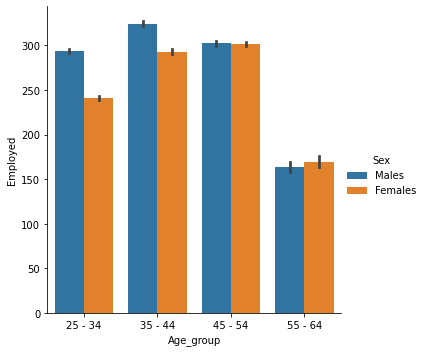

In [87]:
sns.catplot(x='Age_group', y='Employed', data=employment, hue='Sex', kind='bar')

In [88]:
m=employment[['Employed', 'Unemployed', 'Sex']
          ].groupby(employment['Year']).sum()
m

,Employed,Unemployed
Year,,
1989,25613,567.0
1990,25726,560.0
1991,24834,1356.0
1992,23548,2527.0
1993,22379,3709.0
1994,22369,3815.0
1995,22802,3649.0
1996,23094,3471.0
1997,23298,2911.0


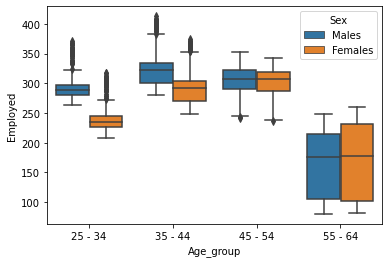

In [89]:
sns.boxplot(x='Age_group', y='Employed', data=employment, hue='Sex')

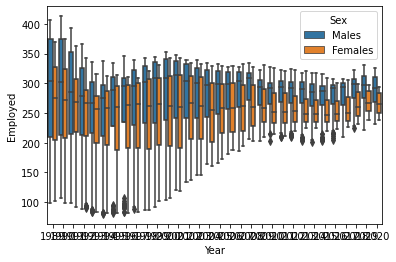

In [90]:
sns.boxplot(x='Year', y='Employed', data=employment, hue='Sex')

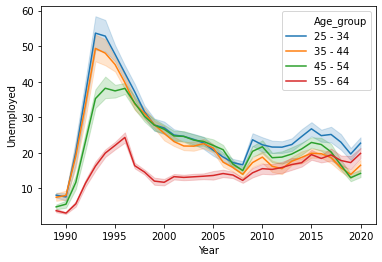

In [91]:
sns.lineplot(x='Year', y='Unemployed', data=employment, hue='Age_group')

GEODATA AND MAPPING UNEMPLOYMENT AND EMPLOYMENT SITUATION IN FINLAND

In [10]:
loc_name=['Year', 'Region', 'Employed', 'Unemployed', 'Employment_rate', 'Unemployment_rate']
location= pd.read_csv('Location.csv', sep=';', skiprows= 3, encoding='latin-1', 
                      names=loc_name)
#location['Id'], location['Area']=zip(*location['Region'].str.split()).tolist()
location['Id'], location['Area']=zip(*location['Region'].str.split(' ', n=1))
del location['Region']
del location['Id']
location=pd.DataFrame(location[['Area', 'Year', 'Employed', 'Unemployed',
               'Employment_rate', 'Unemployment_rate']])
location
#[loc[1] for loc in location['Region']]
location.set_index(['Area'])

,Year,Employed,Unemployed,Employment_rate,Unemployment_rate
Area,,,,,
Uusimaa,2011,793,49,73.9,5.8
Southwest Finland,2011,214,18,68.5,7.9
Satakunta,2011,100,7,67.8,6.1
Kanta-Häme,2011,79,5,68.9,6.4
Pirkanmaa,2011,223,24,68.1,9.6
...,...,...,...,...,...
Central Ostrobothnia,2020,29,2,75.3,6.6
North Ostrobothnia,2020,178,16,69.1,8.4
Kainuu,2020,27,2,63.9,7.4


In [11]:
location.dtypes, location.columns

(Area                  object
 Year                   int64
 Employed               int64
 Unemployed             int64
 Employment_rate      float64
 Unemployment_rate    float64
 dtype: object,
 Index(['Area', 'Year', 'Employed', 'Unemployed', 'Employment_rate',
        'Unemployment_rate'],
       dtype='object'))

In [12]:
location.Area.unique()

array(['Uusimaa', 'Southwest Finland', 'Satakunta', 'Kanta-Häme',
       'Pirkanmaa', 'Päijät-Häme', 'Kymenlaakso', 'South Karelia',
       'South Savo', 'North Savo', 'North Karelia', 'Central Finland',
       'South Ostrobothnia', 'Ostrobothnia', 'Central Ostrobothnia',
       'North Ostrobothnia', 'Kainuu', 'Lapland', 'Åland'], dtype=object)

In [13]:
location['Area']=location['Area'].replace('Southwest Finland', 'Varsinais-Suomi')
location['Area']= location['Area'].replace(['South Ostrobothnia',
                                            'North Ostrobothnia','Central Ostrobothnia'], 'Ostrobothnia')
location.Area.unique()


array(['Uusimaa', 'Varsinais-Suomi', 'Satakunta', 'Kanta-Häme',
       'Pirkanmaa', 'Päijät-Häme', 'Kymenlaakso', 'South Karelia',
       'South Savo', 'North Savo', 'North Karelia', 'Central Finland',
       'Ostrobothnia', 'Kainuu', 'Lapland', 'Åland'], dtype=object)

Loading the geographical location dataset

In [14]:
fi_name=['City', 'Latitude', 'Longitude', 'Country', 'iso2',
        'Area', 'Capital', 'Population', 'Population_proper']
geo_loc=pd.read_csv('fi.csv', names=fi_name, skiprows=1)
geo_loc=pd.DataFrame(geo_loc[['Area', 'Latitude', 'Longitude']])

geo_loc
geo_loc.set_index(['Area'])


,Latitude,Longitude
Area,,
Uusimaa,60.1756,24.9342
Uusimaa,60.2100,24.6600
Pirkanmaa,61.4981,23.7608
Uusimaa,60.3000,25.0333
Pohjois-Pohjanmaa,65.0142,25.4719
...,...,...
Åland,60.4500,21.0833
Pohjois-Savo,63.1500,27.3000
Kanta-Häme,60.8000,23.7667


In [15]:
geo_loc['Area']=geo_loc['Area'].replace('Lappi', 'Lapland')
geo_loc['Area']=geo_loc['Area'].replace(['Pohjois-Savo', 
                                         'Etelä-Savo'],
                                        ['North Savo', 'South Savo'])
geo_loc['Area']=geo_loc['Area'].replace(['Keski-Suomi'], 'Central Finland')
geo_loc['Area']=geo_loc['Area'].replace(['Pohjois-Karjala', 'Etelä-Karjala'], ['North Karelia','South Karelia'])
#geo_loc['Area']=geo_loc['Area'].replace(['Pohjois-Pohjanmaa', 'Etelä-Pohjanmaa',
                                       # 'Pohjanmaa'], ['North Ostrobohnia','South Ostrobothnia', 'Ostrobothnia'])
geo_loc['Area']=geo_loc['Area'].replace('Keski-Pohjanmaa', 'Central Ostrobothnia')
geo_loc['Area']=geo_loc['Area'].replace('Pohjois-Pohjanmaa', 'North Ostrobothnia')
geo_loc['Area']=geo_loc['Area'].replace('Etelä-Pohjanmaa', 'South Ostrobothnia')
geo_loc['Area']=geo_loc['Area'].replace('Pohjanmaa', 'Ostrobothnia')
#geo_loc['Area']=geo_loc.Area.drop_duplicates()
#geo_loc= geo_loc.dropna()
geo_loc.Area.unique()


array(['Uusimaa', 'Pirkanmaa', 'North Ostrobothnia', 'Varsinais-Suomi',
       'Central Finland', 'Päijät-Häme', 'North Savo', 'Kymenlaakso',
       'Satakunta', 'North Karelia', 'South Karelia', 'Kanta-Häme',
       'Ostrobothnia', 'Lapland', 'South Ostrobothnia', 'South Savo',
       'Central Ostrobothnia', 'Kainuu', 'Åland'], dtype=object)

In [16]:
lng=geo_loc.set_index('Area').T.to_dict('list')
lng

<ipython-input-16-d98cf151e2db>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  lng=geo_loc.set_index('Area').T.to_dict('list')


{'Uusimaa': [60.6333, 26.2167],
 'Pirkanmaa': [62.2, 23.1833],
 'North Ostrobothnia': [65.5667, 28.25],
 'Varsinais-Suomi': [60.55, 21.35],
 'Central Finland': [62.8667, 24.7833],
 'Päijät-Häme': [61.5833, 26.0167],
 'North Savo': [63.15, 27.3],
 'Kymenlaakso': [60.6667, 27.7],
 'Satakunta': [61.0333, 22.3333],
 'North Karelia': [62.1833, 30.3833],
 'South Karelia': [61.15, 28.05],
 'Kanta-Häme': [60.8, 23.7667],
 'Ostrobothnia': [63.15, 22.25],
 'Lapland': [69.8833, 27.0],
 'South Ostrobothnia': [62.1167, 21.9667],
 'South Savo': [61.6333, 26.8],
 'Central Ostrobothnia': [63.5333, 24.65],
 'Kainuu': [64.8667, 27.6667],
 'Åland': [60.45, 21.0833]}

In [17]:
location['LatLong']= location['Area'].map(lng)
location.Area.unique()

array(['Uusimaa', 'Varsinais-Suomi', 'Satakunta', 'Kanta-Häme',
       'Pirkanmaa', 'Päijät-Häme', 'Kymenlaakso', 'South Karelia',
       'South Savo', 'North Savo', 'North Karelia', 'Central Finland',
       'Ostrobothnia', 'Kainuu', 'Lapland', 'Åland'], dtype=object)

 I define the longitude and latitude

In [18]:
location['Latitude']= [loc[0] for loc in location.LatLong]
location['Longitude']=[loc[1] for loc in location['LatLong']]
del location['LatLong']
location

,Area,Year,Employed,Unemployed,Employment_rate,Unemployment_rate,Latitude,Longitude
0,Uusimaa,2011,793,49,73.9,5.8,60.6333,26.2167
1,Varsinais-Suomi,2011,214,18,68.5,7.9,60.5500,21.3500
2,Satakunta,2011,100,7,67.8,6.1,61.0333,22.3333
3,Kanta-Häme,2011,79,5,68.9,6.4,60.8000,23.7667
4,Pirkanmaa,2011,223,24,68.1,9.6,62.2000,23.1833
...,...,...,...,...,...,...,...,...
185,Ostrobothnia,2020,29,2,75.3,6.6,63.1500,22.2500
186,Ostrobothnia,2020,178,16,69.1,8.4,63.1500,22.2500
187,Kainuu,2020,27,2,63.9,7.4,64.8667,27.6667
188,Lapland,2020,75,8,67.8,9.3,69.8833,27.0000


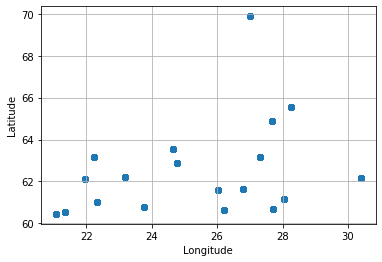

In [101]:
#fig, ax = plt.subplots(1,figsize=(15, 10))
plt.scatter(location.Longitude, location.Latitude)
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [102]:
location.Area.unique()

array(['Uusimaa', 'Varsinais-Suomi', 'Satakunta', 'Kanta-Häme',
       'Pirkanmaa', 'Päijät-Häme', 'Kymenlaakso', 'South Karelia',
       'South Savo', 'North Savo', 'North Karelia', 'Central Finland',
       'South Ostrobothnia', 'Ostrobothnia', 'Central Ostrobothnia',
       'North Ostrobothnia', 'Kainuu', 'Lapland', 'Åland'], dtype=object)

In [103]:
geodata=gpd.read_file('/Users/nghitran/Downloads/maakunta1000k_2021')
geodata=geodata.rename(columns= {'name': 'Area'})
geodata['Area']= geodata['Area'].replace('Southwest Finland', 'Varsinais-Suomi')
del geodata['maakunta'] 
del geodata['vuosi'] 
del geodata['namn']
del geodata['nimi']
#geodata11=geodata11[['name', 'geometry']]
geodata.head()


,Area,geometry
0,Uusimaa,"MULTIPOLYGON (((444038.768 6703649.355, 443982..."
1,Varsinais-Suomi,"MULTIPOLYGON (((191622.791 6776769.888, 191390..."
2,Satakunta,"MULTIPOLYGON (((204129.176 6879304.426, 204090..."
3,Kanta-Häme,"POLYGON ((358726.220 6715710.045, 357451.777 6..."
4,Pirkanmaa,"POLYGON ((328776.641 6760201.180, 326640.495 6..."


In [104]:
mapp= dict(geodata.values)
mapp
location['geometry']=location['Area'].map(mapp).astype('geometry')
location

,Area,Year,Employed,Unemployed,Employment_rate,Unemployment_rate,Latitude,Longitude,geometry
0,Uusimaa,2011,793,49,73.9,5.8,60.6333,26.2167,"MULTIPOLYGON (((444038.768 6703649.355, 443982..."
1,Varsinais-Suomi,2011,214,18,68.5,7.9,60.5500,21.3500,"MULTIPOLYGON (((191622.791 6776769.888, 191390..."
2,Satakunta,2011,100,7,67.8,6.1,61.0333,22.3333,"MULTIPOLYGON (((204129.176 6879304.426, 204090..."
3,Kanta-Häme,2011,79,5,68.9,6.4,60.8000,23.7667,"POLYGON ((358726.220 6715710.045, 357451.777 6..."
4,Pirkanmaa,2011,223,24,68.1,9.6,62.2000,23.1833,"POLYGON ((328776.641 6760201.180, 326640.495 6..."
...,...,...,...,...,...,...,...,...,...
185,Central Ostrobothnia,2020,29,2,75.3,6.6,63.5333,24.6500,"MULTIPOLYGON (((324971.754 7111787.142, 324925..."
186,North Ostrobothnia,2020,178,16,69.1,8.4,65.5667,28.2500,"MULTIPOLYGON (((422592.703 7260935.963, 422522..."
187,Kainuu,2020,27,2,63.9,7.4,64.8667,27.6667,"POLYGON ((563043.244 7060737.936, 562153.475 7..."
188,Lapland,2020,75,8,67.8,9.3,69.8833,27.0000,"MULTIPOLYGON (((375689.024 7297894.089, 375646..."


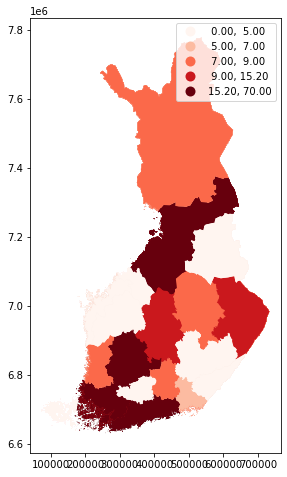

In [105]:
from geopandas import GeoDataFrame
location = GeoDataFrame(location)
fig, ax = plt.subplots(1, figsize=(10, 8))
location.plot(column='Unemployed', ax = ax, scheme="quantiles", cmap="Reds", legend=True)
#plt.scatter(location.Longitude, location.Latitude, marker= 'p', c='red')
#plt.show()

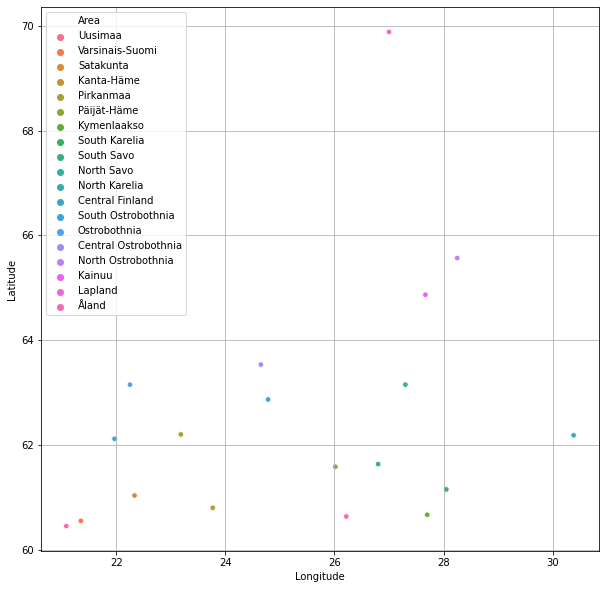

In [106]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Longitude', y='Latitude', 
                data= location, s=30, hue='Area')
plt.grid()
plt.show()

In [107]:
# I want to check the Unemployment and Employment rate in Finland in 2020 only
location.head()
year2020= location[location.Year==2020]
year2020.head()

,Area,Year,Employed,Unemployed,Employment_rate,Unemployment_rate,Latitude,Longitude,geometry
171,Uusimaa,2020,850,66,74.1,7.2,60.6333,26.2167,"MULTIPOLYGON (((444038.768 6703649.355, 443982..."
172,Varsinais-Suomi,2020,223,17,72.7,7.2,60.5500,21.3500,"MULTIPOLYGON (((191622.791 6776769.888, 191390..."
173,Satakunta,2020,95,8,72.3,7.4,61.0333,22.3333,"MULTIPOLYGON (((204129.176 6879304.426, 204090..."
174,Kanta-Häme,2020,76,5,72.9,6.2,60.8000,23.7667,"POLYGON ((358726.220 6715710.045, 357451.777 6..."
175,Pirkanmaa,2020,239,21,71.2,8.2,62.2000,23.1833,"POLYGON ((328776.641 6760201.180, 326640.495 6..."


(40857.3392150002, 765862.4790850003, 6575077.82061, 7833703.751590001)

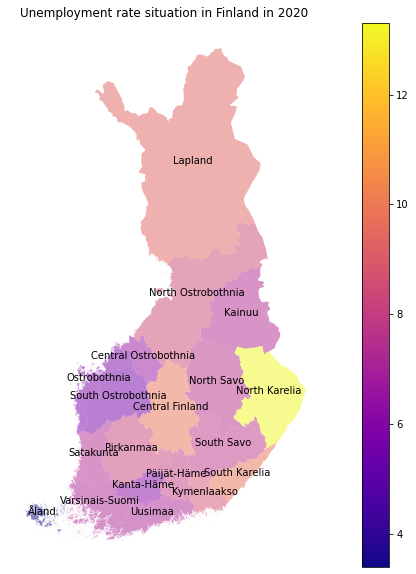

In [108]:
fig,ax = plt.subplots(1,1, figsize=(15,10))
year2020.plot(column='Unemployment_rate', cmap='plasma', alpha=.5, ax=ax, legend=True)
year2020.apply(lambda x:ax.annotate(s=x.Area, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
#plt.scatter(location.Longitude, location.Latitude, marker= 'p', c='red')
plt.title('Unemployment rate situation in Finland in 2020')
plt.axis('off')

We can clearly see that Karelia area has the highest unemployment rate in 2020

Whereas moving to the South area, there is the least unemployment rate

In [109]:
# To make sure if the map is plotted correctly, we can look at the following table
year2020.head()
labour_rate_2020=year2020[['Area', 'Unemployment_rate', 'Employment_rate']]
labour_rate_2020.sort_values(by='Unemployment_rate', ascending= False)

,Area,Unemployment_rate,Employment_rate
181,North Karelia,13.3,64.1
178,South Karelia,9.8,64.4
182,Central Finland,9.8,68.0
188,Lapland,9.3,67.8
177,Kymenlaakso,8.7,67.9
186,North Ostrobothnia,8.4,69.1
175,Pirkanmaa,8.2,71.2
176,Päijät-Häme,8.0,71.4
179,South Savo,7.8,69.6
180,North Savo,7.6,69.2


(40857.3392150002, 765862.4790850003, 6575077.82061, 7833703.751590001)

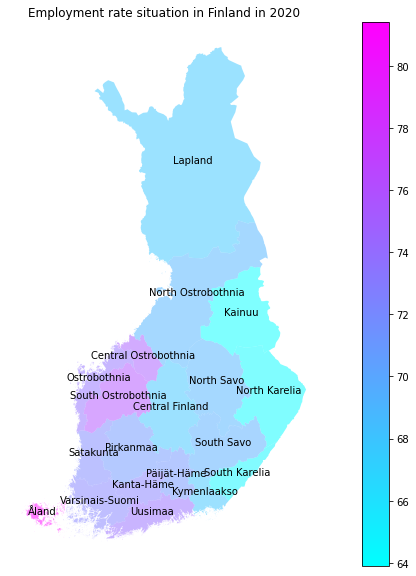

In [110]:
fig,ax = plt.subplots(1,1, figsize=(15,10))
year2020.plot(column='Employment_rate', cmap='cool', alpha=.5, ax=ax, legend=True)
year2020.apply(lambda x:ax.annotate(s=x.Area, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
#plt.scatter(location.Longitude, location.Latitude, marker= 'p', c='red')
plt.title('Employment rate situation in Finland in 2020')
plt.axis('off')

As the same outcome, we can see the Uusimaa and Varsinais suomi has the highest employment rate in 2020